<a href="https://colab.research.google.com/github/VivekSalunkhe14/Cascade/blob/main/Cascade_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Exploratory Data Analysis with Python**
**Importing libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Importing the original as well as preprocessed dataset obtained after Data Preprocessing**

In [ ]:
absent = pd.read_csv('/content/drive/MyDrive/Absenteeism_at_work.csv')

In [ ]:
absent_Preprocessed = pd.read_csv('/content/drive/MyDrive/Absent_Preprocessed.csv')

In [ ]:
absent_Preprocessed.columns = absent_Preprocessed.columns.str.replace('/', ' per ').str.strip()

In [ ]:
absent_Preprocessed.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Reason_Justified,Month_Name,Day_Name,Season_Name,Education_Details,Disciplinary_Status,Drinking_Status,Smoking_Status,Travel Expense per km,Travel Cost Category,Joining_Age,Age_Group
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4,Unjustified absence,Jul,Tuesday,Summer,High School,Disciplined,Drinker,Nonsmoker,8.03,Affordable,20,Young Employee
1,36,26,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,8,Unjustified absence,Jul,Tuesday,Summer,High School,Indisciplined,Drinker,Nonsmoker,9.08,Affordable,32,Old Employee
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2,Medical consultation,Jul,Wednesday,Summer,High School,Disciplined,Drinker,Nonsmoker,3.51,Cheap,20,Mid-Age Employee
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4,Diseases of the eye and adnexa,Jul,Thursday,Summer,High School,Disciplined,Drinker,Smoker,55.80,Expensive,25,Mid-Age Employee
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2,Medical consultation,Jul,Thursday,Summer,High School,Disciplined,Drinker,Nonsmoker,8.03,Affordable,20,Young Employee


# **Correlation plot for absent dataset**

We observed that majority of the correlation values are near to 0 which states that there are no highly dependent features except some of the features having value near to  ±0.45 which indicates slightly correlated attributes.

In [ ]:
corr = absent.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,1.00,-0.06,-0.00,0.03,0.10,-0.22,-0.49,-0.27,0.04,0.09,0.02,0.00,-0.04,0.00,-0.45,-0.01,-0.04,-0.25,0.08,-0.31,-0.02
Reason for absence,-0.06,1.00,-0.08,0.12,-0.12,-0.12,0.16,0.05,-0.08,-0.12,0.09,-0.55,-0.05,-0.06,0.07,-0.12,-0.06,-0.00,-0.08,0.04,-0.17
Month of absence,-0.00,-0.08,1.00,-0.01,0.41,0.14,-0.00,-0.06,-0.00,-0.17,-0.46,0.11,-0.07,0.08,0.06,-0.04,0.05,0.02,-0.07,0.05,0.02
Day of the week,0.03,0.12,-0.01,1.00,0.05,0.03,0.12,0.02,0.00,0.02,0.03,-0.02,0.06,0.10,0.04,0.01,-0.03,-0.13,-0.08,-0.10,-0.12
Seasons,0.10,-0.12,0.41,0.05,1.00,0.04,-0.06,-0.01,-0.01,0.15,-0.06,0.15,-0.00,0.05,-0.05,-0.05,0.01,-0.03,-0.03,-0.01,-0.01
Transportation expense,-0.22,-0.12,0.14,0.03,0.04,1.00,0.26,-0.35,-0.23,0.01,-0.08,0.11,-0.06,0.38,0.15,0.04,0.40,-0.21,-0.19,-0.14,0.03
Distance from Residence to Work,-0.49,0.16,-0.00,0.12,-0.06,0.26,1.00,0.13,-0.15,-0.07,-0.01,-0.06,-0.26,0.05,0.45,-0.08,0.21,-0.05,-0.35,0.11,-0.09
Service time,-0.27,0.05,-0.06,0.02,-0.01,-0.35,0.13,1.00,0.67,-0.00,-0.01,-0.00,-0.21,-0.05,0.35,0.07,-0.44,0.46,-0.05,0.50,0.02
Age,0.04,-0.08,-0.00,0.00,-0.01,-0.23,-0.15,0.67,1.00,-0.04,-0.04,0.10,-0.22,0.06,0.21,0.12,-0.23,0.42,-0.06,0.47,0.07
Work load Average/day,0.09,-0.12,-0.17,0.02,0.15,0.01,-0.07,-0.00,-0.04,1.00,-0.09,0.03,-0.07,0.03,-0.03,0.03,0.01,-0.04,0.10,-0.09,0.02


# **Distribution of Absentee Time with respect to important parameters using Bar Chart**

**1. Season wise Absenteeism Time**

In [ ]:
Season_table= absent_Preprocessed.groupby('Season_Name')['Absenteeism time in hours'].sum().reset_index(name='Total absent time in hours')
Season_table

,Season_Name,Total absent time in hours
0,Autumn,1162
1,Spring,1407
2,Summer,1281
3,Winter,1596


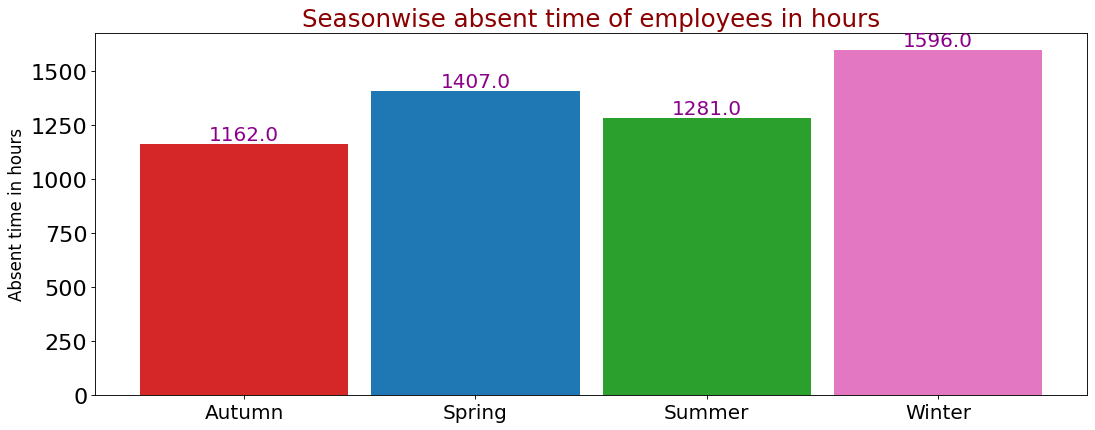

In [ ]:
plt.figure(figsize=(16,6), dpi= 80)
plt.bar(Season_table['Season_Name'], Season_table['Total absent time in hours'], color=['tab:red', 'tab:blue', 'tab:green', 'tab:pink']  , width=.9)
for i, val in enumerate(Season_table['Total absent time in hours'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':18},color='darkmagenta',size=18)

plt.gca().set_xticklabels(Season_table['Season_Name'], horizontalalignment= 'center',fontsize=18)
plt.title("Seasonwise absent time of employees in hours", fontsize=22,color="darkred")
plt.ylabel('Absent time in hours',size=15)
plt.show()


Majority of the Absenteeism time was recorded in the Winter and Spring Season. In order to overcome the issue company can initiate certain awareness to ensure healthy environment at the workplace.

**2.	Monthly distribution of Absenteeism Time**

In [ ]:
Month_table= absent_Preprocessed.groupby('Month_Name')['Absenteeism time in hours'].sum().reset_index(name='Total absent time in hours')
Month_table

,Month_Name,Total absent time in hours
0,Apr,490
1,Aug,288
2,Dec,414
3,Feb,294
4,Jan,224
5,Jul,750
6,Jun,435
7,Mar,797
8,May,448
9,Nov,521


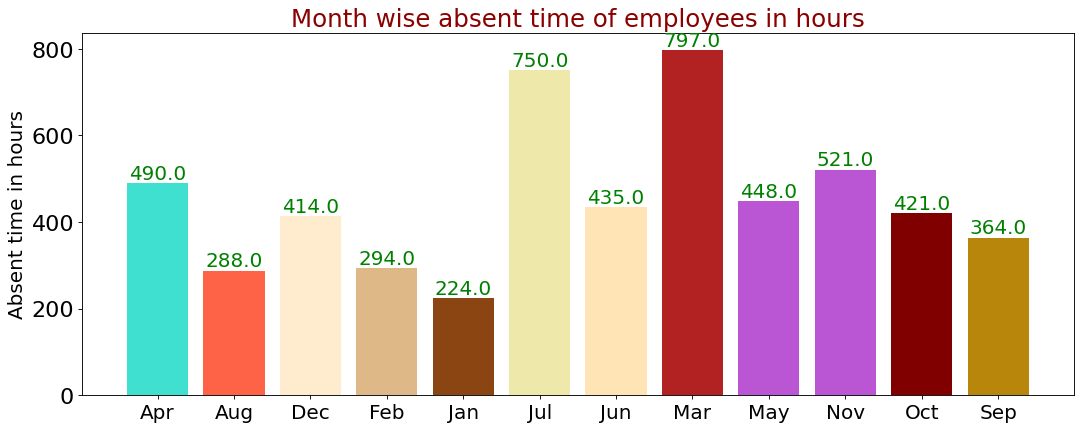

In [ ]:
import random
n = Month_table['Month_Name'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(2)
c = random.choices(all_colors, k=n)  

plt.figure(figsize=(16,6), dpi= 80)
plt.bar(Month_table['Month_Name'], Month_table['Total absent time in hours'],color=c, width=0.8)
for i, val in enumerate(Month_table['Total absent time in hours'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':18},color='g',size=18)

plt.gca().set_xticklabels(Month_table['Month_Name'], horizontalalignment= 'center',fontsize=18)
plt.title("Month wise absent time of employees in hours", fontsize=22,color="darkred")
plt.ylabel('Absent time in hours',fontsize=18)
plt.show()

We observe that during the months of June and July i.e., during Winter season in Brazil the average of Absenteeism Time is greater as compared to other months. Also, the lowest value is recorded in the months of January and February. Execution of seasonal measures would aid in lowering the monthly absenteeism time.


**3. 	Educational Qualification wise Absenteeism Time**

In [ ]:
Education_table= absent_Preprocessed.groupby('Education_Details')['Absenteeism time in hours'].sum().reset_index(name='Total absent time in hours')
Education_table

,Education_Details,Total absent time in hours
0,Graduate,318
1,High School,4683
2,Master & Doctor,21
3,Post Graduate,424


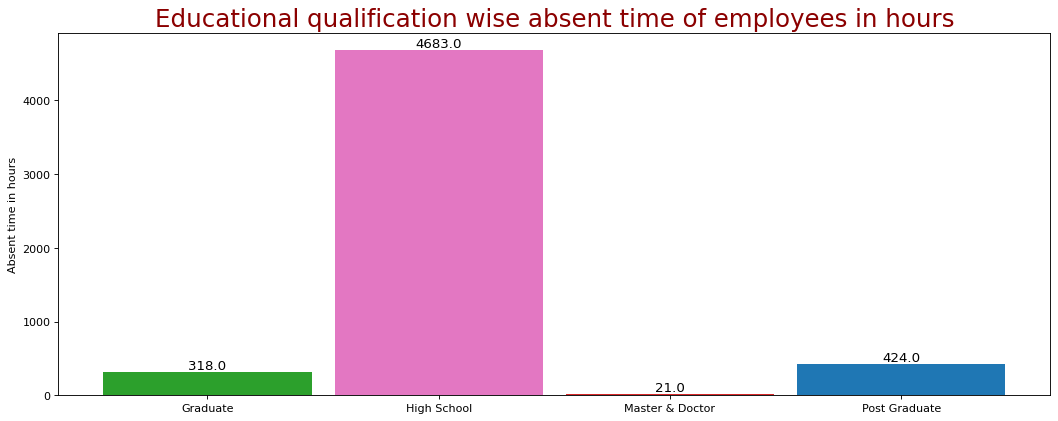

In [ ]:
plt.figure(figsize=(16,6), dpi= 80)
plt.bar(Education_table['Education_Details'], Education_table['Total absent time in hours'], color=['tab:green', 'tab:pink', 'tab:red', 'tab:blue'], width=.9)
for i, val in enumerate(Education_table['Total absent time in hours'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12},color='black')

plt.gca().set_xticklabels(Education_table['Education_Details'], horizontalalignment= 'center',fontsize=10)
plt.title("Educational qualification wise absent time of employees in hours", fontsize=22,color="darkred")
plt.ylabel('Absent time in hours')
plt.show()


Majority of the High School Graduates were observed to be absent for most of the time. This can be tackled by conducting counselling sessions or workshops in order to make them realise the importance of the job.


# **Density curves with Histogram**

**1.Distribution of BMI among Employees**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Body Mass Index(BMI) among employees')

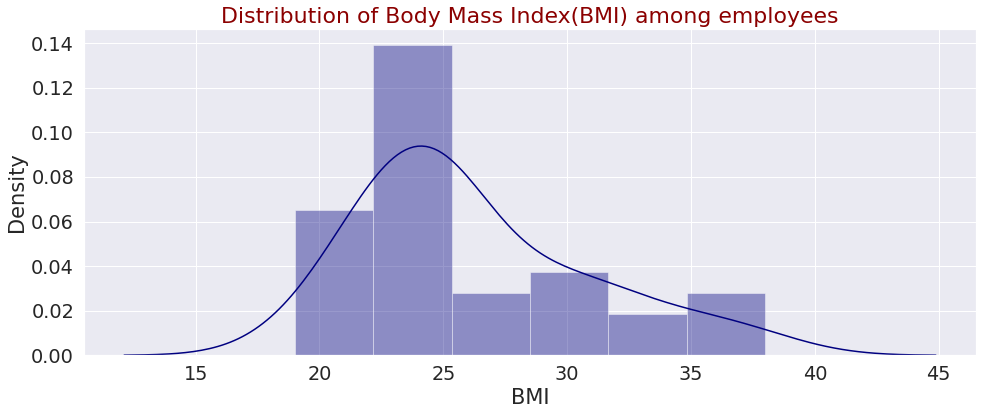

In [ ]:
BMI_table= absent_Preprocessed.groupby('ID')['Body mass index'].median().reset_index(name='BMI')
sns.set(font_scale=1.75)
plt.figure(figsize=(16, 6))
sns.distplot(BMI_table['BMI'],color='navy').set_title('Distribution of Body Mass Index(BMI) among employees',fontsize=22,color='darkred')

Insight: It can be clearly visualized from the distribution that there are no employees with BMI less than 19 which indicates that none of the employee fall in the Underweight Category. Also, majority of them fall in the Normal category between 19 to 25 which signifies healthy lifestyle. 

**2. Distribution of Service Time**


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of service time')

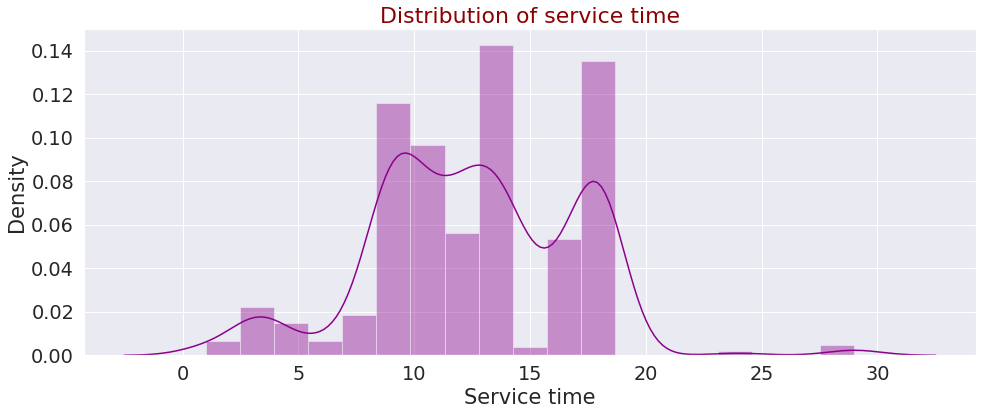

In [ ]:
plt.figure(figsize=(16, 6))
sns.set(font_scale=1.75)
sns.distplot(absent_Preprocessed['Service time'],color='darkmagenta').set_title('Distribution of service time',fontsize=22,color='darkred')

Insight: As seen from the probability density curve that majority of the employees are highly experienced as they lie in the period of 10 to 20 years.

**3.Distribution of Total Expense per km**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Travel expense by various employees distribution')

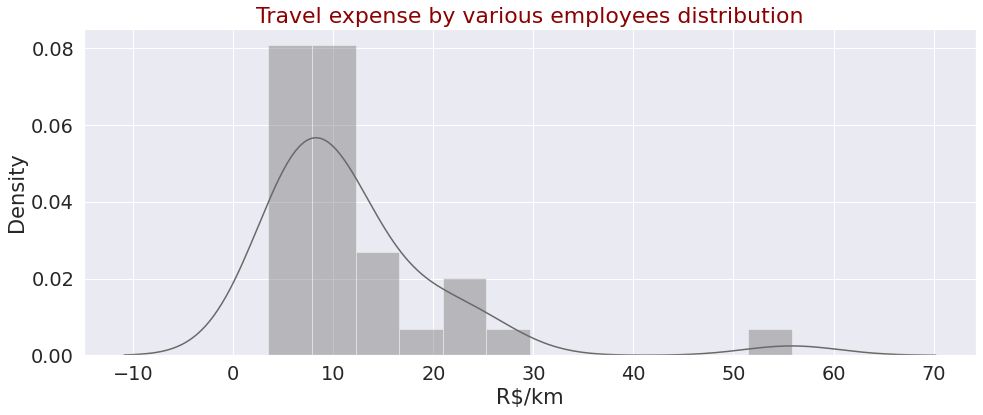

In [ ]:
expense_table= absent_Preprocessed.groupby('ID')['Travel Expense per km'].median().reset_index(name='R$/km')
sns.set(font_scale=1.75)
plt.figure(figsize=(16, 6))
sns.distplot(expense_table['R$/km'],color='dimgrey').set_title('Travel expense by various employees distribution',fontsize=22,color='darkred')

Insight: As observed from the distribution majority of the employees spend approximately less than 10R$ per km to travel to the workplace. 

**4. Distribution of Age among Employees**

Text(0.5, 0, 'age of employee in years')

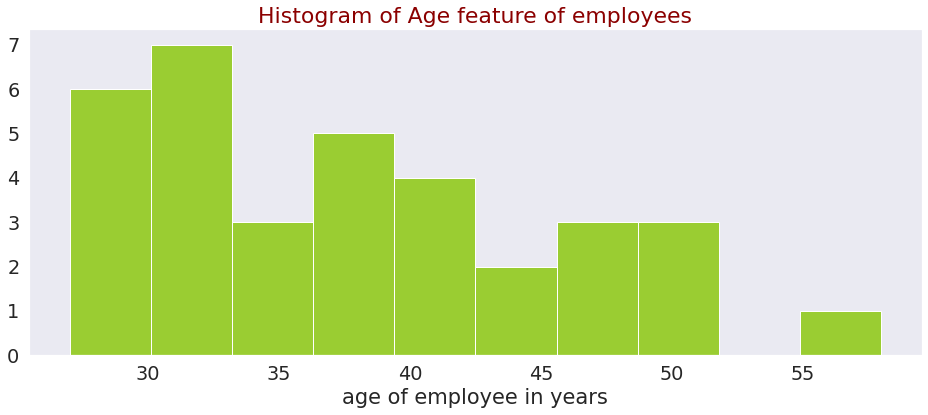

In [ ]:
AGE_table= absent_Preprocessed.groupby('ID')['Age'].median().reset_index(name='age')
sns.set(font_scale=1.75)
plt.figure(figsize=(16, 6))
plt.title("Histogram of Age feature of employees", fontsize=22,color="darkred")
AGE_table['age'].hist(grid=False,color='yellowgreen',)
plt.xlabel("age of employee in years")

# **Scatterplot**

**1. Scatterplot of Hit Target and Workload Average Per Day:**

Text(0.5, 1.0, 'Scatterplot of hit target comparing work load average/day')

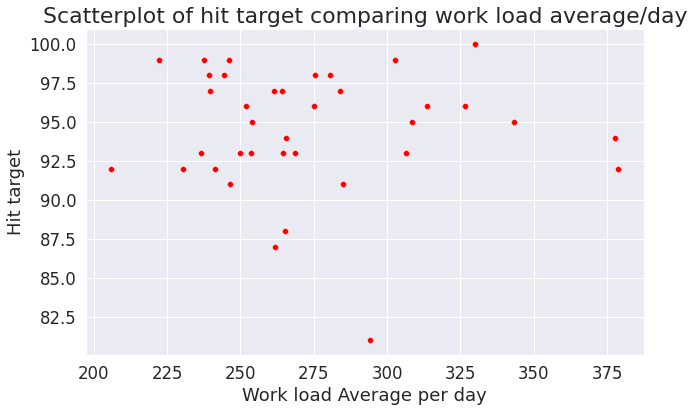

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.5)
sns.scatterplot(data=absent_Preprocessed,x='Work load Average per day', y="Hit target",color='red')
plt.title("Scatterplot of hit target comparing work load average/day",fontsize=22)

Insight: The graph clearly indicates that as the Workload goes on increasing, we observed a significant fall in the target hit. Also, it can be seen that when the workload was below 275 then majority of the employees hit the target.
Proposal: The company should focus on evenly distribution of workload within the employees so as to ensure improvement in Hit Target. Also, in order to motivate the employees’ company can provide perks for hitting the maximum target either on a monthly or quarterly basis.


# **Scatterplots of certain attributes with Linear Regression line of best fit:**

**1. Distribution of Transportation Expense to Distance from Residence to Work**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Scatterplot of Travel expense for covered distance to industry')

<Figure size 1152x432 with 0 Axes>

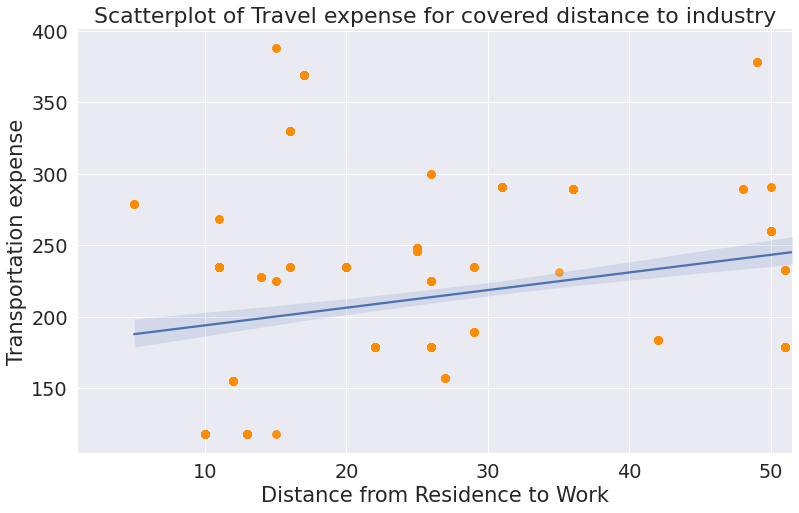

In [ ]:
plt.figure(figsize=(16, 6))
sns.set(font_scale=1.75)
Travel_plot = sns.lmplot(data=absent_Preprocessed,y='Transportation expense', x="Distance from Residence to Work",height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7,color='darkorange'))
Travel_plot.set(xlim=(1, 51.5))
plt.title("Scatterplot of Travel expense for covered distance to industry",fontsize=22)

Insight: The graph depicts that there exists linear relationship between the transportation expense and distance from residence to work. Further the positive slope of Linear regression line indicates that as the distance from residence to work increases then the corresponding transportation expense also increases

**2.Distribution of Height and Weight of employees for undertanding body features.**

Text(0.5, 1.0, "Scatterplot of employee's body features")

<Figure size 1152x432 with 0 Axes>

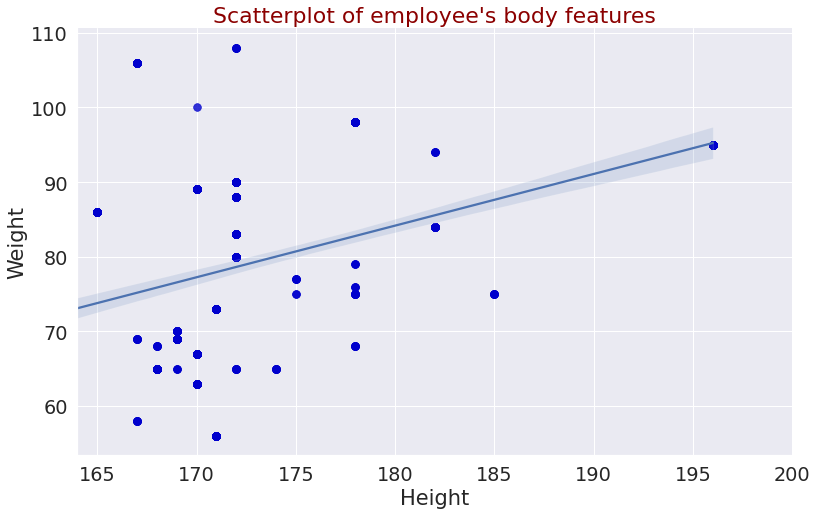

In [ ]:
plt.figure(figsize=(16, 6))
sns.set(font_scale=1.75)
body_plot = sns.lmplot(data=absent_Preprocessed,x='Height', y="Weight",height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7,color='mediumblue'))
body_plot.set(xlim=(164, 200))
plt.title("Scatterplot of employee's body features",fontsize=22,color="darkred")

#**Stacked Histogram for Age attributes**

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


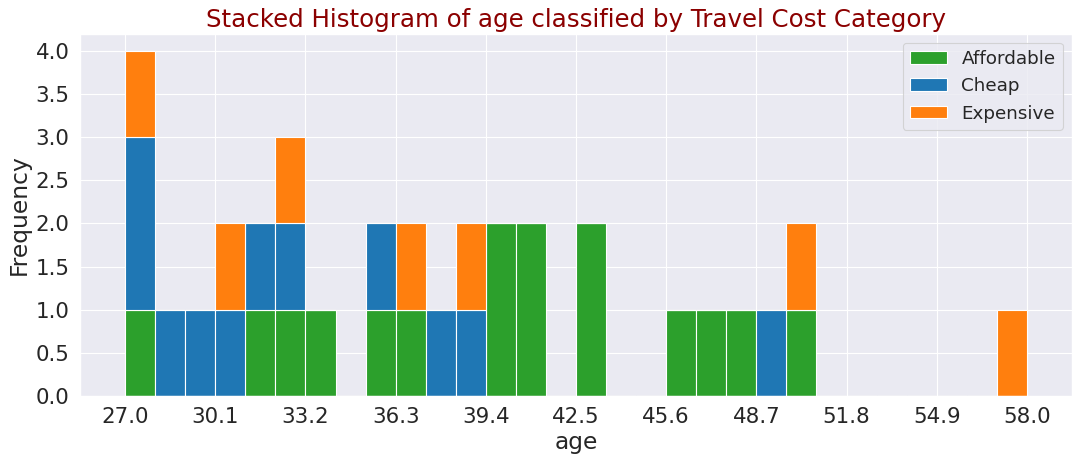

In [ ]:
x_var = 'age'
groupby_var = 'Travel Cost Category'
AGE_table2= absent_Preprocessed.groupby(['ID',groupby_var])['Age'].median().reset_index(name='age')
age_table = AGE_table2.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [AGE_table2[x_var].values.tolist() for i, AGE_table2 in age_table]

# Draw
plt.figure(figsize=(16,6), dpi= 80)
colors = ['tab:green','tab:blue','tab:orange']
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors)
sns.set(font_scale=1.5)
plt.legend({group:col for group, col in zip(np.unique(AGE_table2[groupby_var]).tolist(),colors)})
plt.title("Stacked Histogram of age classified by Travel Cost Category", fontsize=22,color="darkred")
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
plt.show()

#**Trend lines for the count of Sons and Pets based on the Age of Individual**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


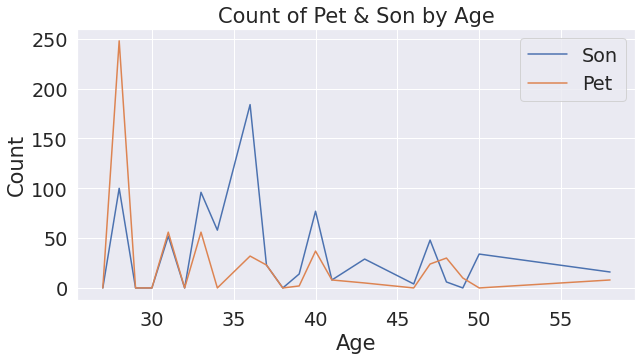

In [ ]:
ax = absent_Preprocessed.groupby('Age')['Son', 'Pet'].sum().plot(figsize=(10,5))
sns.set(font_scale=1.75)
ax.set_ylabel('Count')
ax.set_title('Count of Pet & Son by Age')
plt.show()

# **Trend Line Chart indicating Monthly count of Absenteeism Time in Hours for each Day of the week**

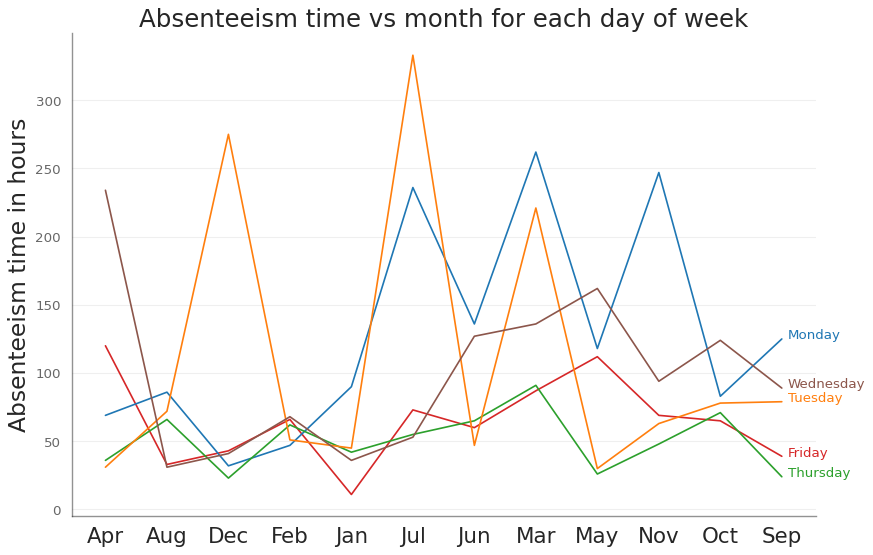

In [ ]:
sns.set_theme(style='white',font_scale=1.75)
day_mon_table= absent_Preprocessed.groupby(['Month_Name','Day_Name'])['Absenteeism time in hours'].sum().reset_index(name='Total absent time in hours')
Day = day_mon_table['Day_Name'].unique()

mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown']      
plt.figure(figsize=(12,8), dpi= 80)

day_mon_table.reset_index(inplace=True)

for i, y in enumerate(Day):
    plt.plot('Month_Name', 'Total absent time in hours', data=day_mon_table.loc[day_mon_table.Day_Name==y, :],
             color=mycolors[i], label=y)
    plt.text(day_mon_table.loc[day_mon_table.Day_Name==y, :].shape[0]-.9, day_mon_table.loc[day_mon_table.Day_Name==y,
                                                                                                         'Total absent time in hours'][-1:].values[0], y, fontsize=12, color=mycolors[i])
plt.ylabel('Absenteeism time in hours')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Absenteeism time vs month for each day of week", fontsize=22)
plt.grid(axis='y', alpha=.3)

plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.5)   
#plt.legend(loc='upper right', ncol=2, fontsize=12)
plt.show()

This plot helps to identify the critical months and their corresponding days in terms of their Absenteeism Time.

# **Categorical Plots describing the distribution of Drinking and Smoking Status among Employees**

In [ ]:
smoker_table= absent_Preprocessed.groupby(['Smoking_Status','Drinking_Status'])['ID'].nunique().reset_index(name="count")
smoker_table.head()

,Smoking_Status,Drinking_Status,count
0,Nonsmoker,Drinker,14
1,Nonsmoker,Nondrinker,13
2,Smoker,Drinker,4
3,Smoker,Nondrinker,3


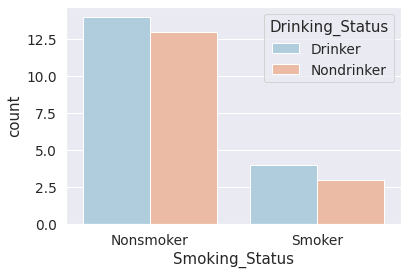

In [ ]:
sns.set_style('whitegrid')
sns.set(font_scale=1.25)
sns.barplot(x='Smoking_Status',y='count',hue='Drinking_Status',data=smoker_table,palette='RdBu_r')

As observed from the plot, majority of the employees were non-smoker however they they were almost equally distributed in the drinker and non-drinker category. Very few individuals were peresent in Smoker Category.

**Top 10 ID's with count of their corresponding Absenteeism Time in hours**

In [ ]:
xx=pd.crosstab(index=absent_Preprocessed["ID"],columns="Absent hours")
xx.sort_values(by='Absent hours',ascending=False).head(10)

col_0,Absent hours
ID,
3,113
28,76
34,55
22,46
20,42
11,40
15,37
36,34
24,30


# **Variation of age within travel cost category using Density Plot**

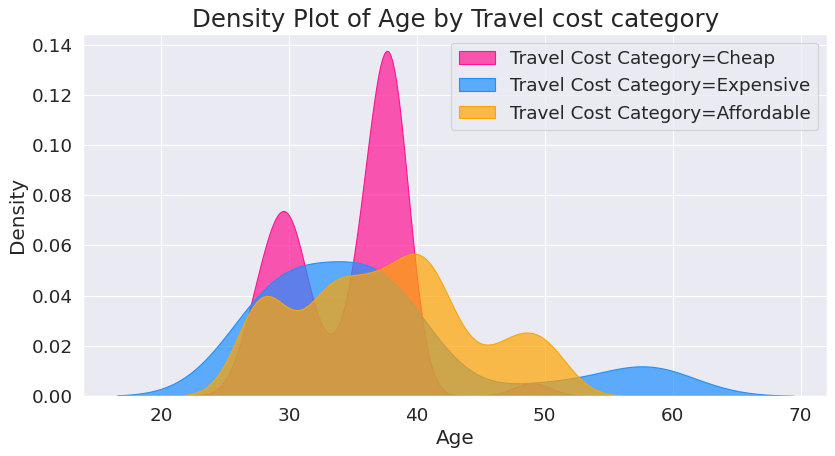

In [ ]:
plt.figure(figsize=(12,6), dpi= 80)
sns.set(font_scale=1.5)
sns.kdeplot(absent_Preprocessed.loc[absent_Preprocessed['Travel Cost Category'] == 'Cheap', "Age"], shade=True, color="deeppink", label="Travel Cost Category=Cheap", alpha=.7)
sns.kdeplot(absent_Preprocessed.loc[absent_Preprocessed['Travel Cost Category'] == 'Expensive', "Age"], shade=True, color="dodgerblue", label="Travel Cost Category=Expensive", alpha=.7)
sns.kdeplot(absent_Preprocessed.loc[absent_Preprocessed['Travel Cost Category'] == 'Affordable', "Age"], shade=True, color="orange", label="Travel Cost Category=Affordable", alpha=.7)
plt.title('Density Plot of Age by Travel cost category', fontsize=22)
plt.legend()
plt.show()

Insight: The graph clearly indicates that majority of the Young and Mid-Age employees belong to Cheap and Affordable Transportation Category and very few prefer Expensive travel. Also, Old Employees focus on comfort and ease while transportation thus they belong to Affordable or Expensive categories.

# **Comparison of Target Hit by different Employees using Diverging Bars**

In [ ]:
 pd.crosstab(index=absent_Preprocessed["Reason_Justified"], 
                           columns=absent_Preprocessed["Season_Name"])

Season_Name,Autumn,Spring,Summer,Winter
Reason_Justified,,,,
Blood donation,0,2,1,0
Certain conditions originating in the perinatal period,0,0,0,3
Certain infectious and parasitic diseases,4,6,5,1
"Congenital malformations, deformations and chromosomal abnormalities",1,0,0,0
Dental consultation,18,32,28,34
Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism,1,0,0,0
Diseases of the circulatory system,0,1,3,0
Diseases of the digestive system,4,4,9,9
Diseases of the ear and mastoid process,1,1,2,2


<Figure size 720x288 with 0 Axes>

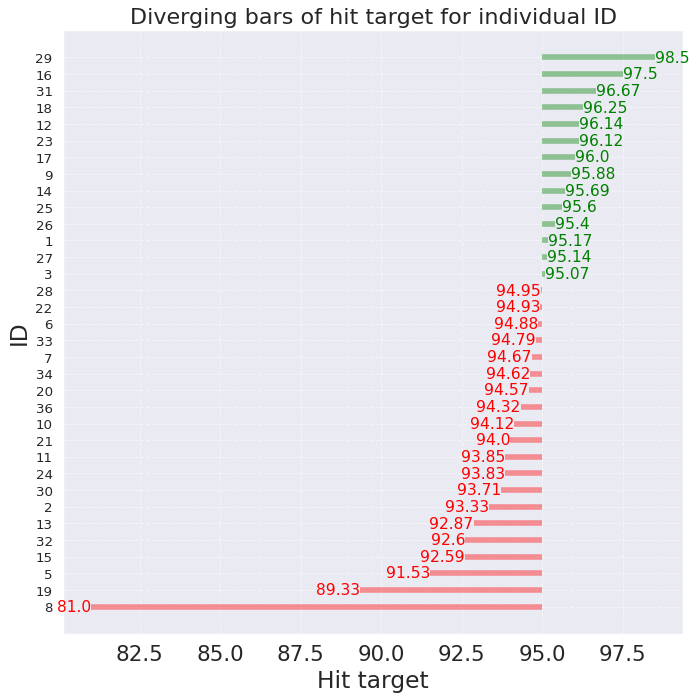

In [ ]:
plt.figure(figsize=(10, 4))
df=absent_Preprocessed.groupby('ID')[['Hit target']].mean()
x = df.loc[:, ['Hit target']]
df['ht']=x
df['colors'] = ['red' if x < 95 else 'green' for x in df['ht']]
df.sort_values('ht', inplace=True)
#df.reset_index(inplace=True)

plt.figure(figsize=(10,10), dpi= 80)
plt.hlines(y=df.index, xmin=95, xmax=df.ht, color=df.colors, alpha=0.4, linewidth=5)

for x, y, tex in zip(df.ht, df.index, df.ht):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 95 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 95 else 'green', 'size':14})

# Decorations
plt.gca().set(ylabel='ID', xlabel='Hit target')
plt.yticks(df.index, df.ID, fontsize=12)
plt.title('Diverging bars of hit target for individual ID', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.savefig('Diverging.jpg')

The graph shows the individuals performing better and worse in terms of completed task. The Green colored ID’s indicate those individuals that are performing good whereas Red colored ID’s gives us an idea about the individuals lacking in terms of work assigned to them.

# **Diverging Dotplot of Absenteeism Time in Hours based on Reason for Absence**

In [ ]:
df1 = absent_Preprocessed.groupby('Reason_Justified')[['Absenteeism time in hours']].mean()
df1

,Absenteeism time in hours
Reason_Justified,
Blood donation,8.000000
Certain conditions originating in the perinatal period,2.000000
Certain infectious and parasitic diseases,11.375000
"Congenital malformations, deformations and chromosomal abnormalities",8.000000
Dental consultation,2.991071
Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism,8.000000
Diseases of the circulatory system,42.000000
Diseases of the digestive system,11.423077
Diseases of the ear and mastoid process,5.333333


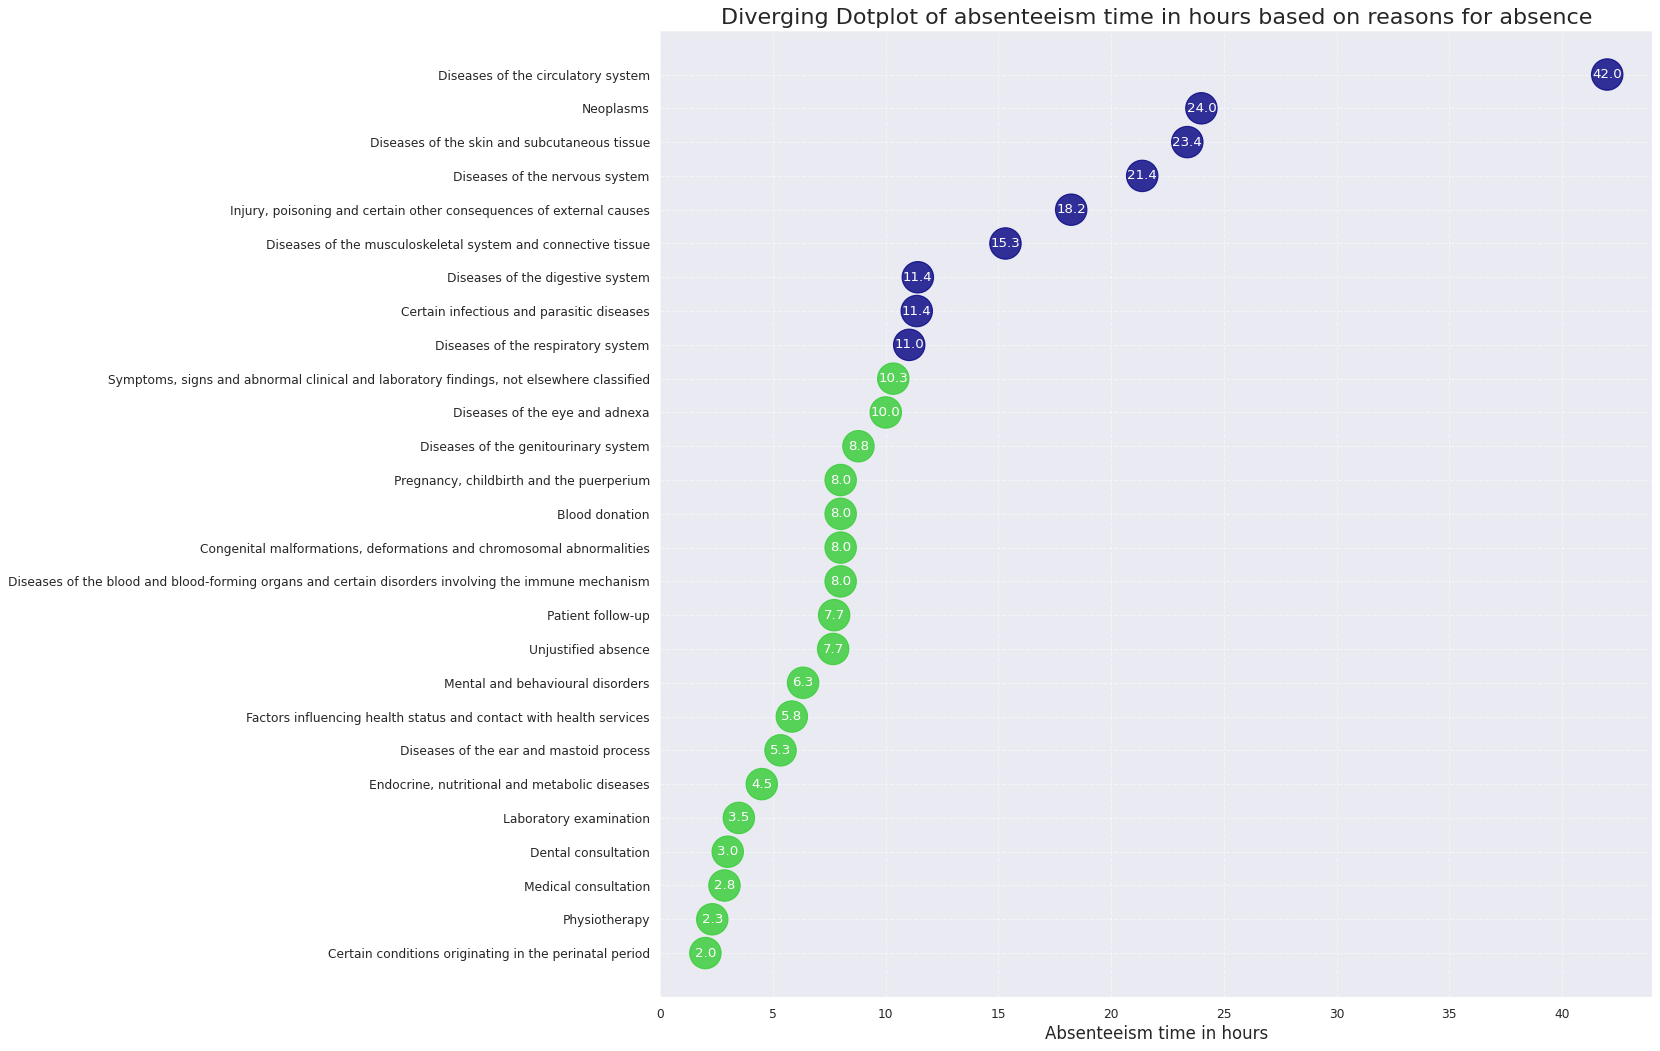

In [ ]:
x = df1.loc[:, ['Absenteeism time in hours']]
df1['Abs_time'] = x
df1['colors'] = ['limegreen' if x < 11 else 'navy' for x in df1['Abs_time']]
df1.sort_values('Abs_time', inplace=True)
#df1.reset_index(inplace=True)
sns.set(font_scale=1)

plt.figure(figsize=(16,16), dpi= 80)
plt.scatter(df1.Abs_time, df1.index, s=800, alpha=.8, color=df1.colors)
for x, y, tex in zip(df1.Abs_time, df1.index, df1.Abs_time):
    t = plt.text(x, y, round(tex, 1), horizontalalignment='center', 
                 verticalalignment='center', fontdict={'color':'white','size':12})


plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.yticks(df1.index, df1.Reason_Justified)
plt.title('Diverging Dotplot of absenteeism time in hours based on reasons for absence', fontdict={'size':20})
plt.xlabel('Absenteeism time in hours',fontsize=15)
plt.grid(linestyle='--', alpha=0.5)
#plt.show()
plt.savefig('Diverging_dot.jpg')

This graph gives an idea about the Reason of Absence in comparison to Average Absenteeism Time in hours.